<a href="https://colab.research.google.com/github/Jwdaniel34/waiter_tips_prediction/blob/main/waiter_tips_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The food server of a restaurant recorded data about the tips given to the waiters for serving the food. The data recorded by the food server is as follows:

*  total_bill: Total bill in dollars including taxes
*   tip: Tip given to waiters in dollars

*   sex: gender of the person paying the bill
*   smoker: whether the person smoked or not

*   day: day of the week
*   time: lunch or dinner

*   size: number of people in a table














In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [21]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv')

In [22]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<ipython-input-4-cd4bba364099>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='total_bill', y='sex', inner='stick', palette='Dark2')


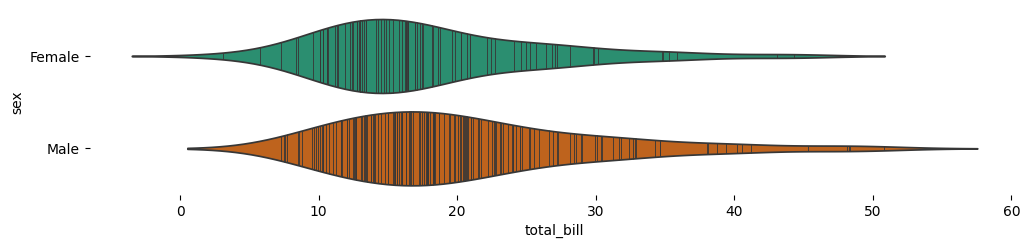

In [4]:
# @title sex vs total_bill

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='total_bill', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
figure = px.scatter(data_frame= data , x="total_bill", y="tip", size='size', color='day',
                    trendline="ols")
figure.show()

In [7]:
figure = px.scatter(data_frame = data, x="total_bill", y="tip", size="size", color="sex", trendline="ols")
figure.show()

In [8]:
figure = px.scatter(data_frame = data, x="total_bill", y="tip", size="size", color="smoker", trendline="ols")
figure.show()

In [10]:
figure = px.scatter(data_frame = data, x="total_bill", y="tip", size="size", color="time", trendline="ols")
figure.show()

Tips according to the day

In [12]:
figure = px.pie(data, values='tip', names='day', hole=0.5)
figure.show()

In [13]:
figure = px.pie(data, values='tip', names='sex', hole=0.5)
figure.show()

In [14]:
figure = px.pie(data, values='tip', names='smoker', hole=0.5)
figure.show()

In [15]:
figure = px.pie(data, values='tip', names='time', hole=0.5)
figure.show()

In [18]:
data['sex'] = data['sex'].map({'Female': 0, 'Male': 1})
# data['smoker'] = data['smoker'].map({'No': 0, 'Yes': 1})
# data['time'] = data['time'].map({'Lunch': 0, 'Dinner': 1})
# data['day'] = data['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

In [23]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
for col in ['sex', 'smoker', 'time', 'day']:
  print(f'{col}: {data[col].unique()}')
  data[col] = data[col].astype('category')

sex: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
smoker: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
time: ['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']
day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']


In [46]:
data_dummies = pd.get_dummies(data, columns=['sex', 'smoker', 'time', 'day']).astype('int64').drop(columns=['total_bill', 'tip', 'size'], axis=1)

In [50]:
new_data = pd.concat([data[['total_bill', 'tip', 'size']], data_dummies], axis=1)

In [52]:
x = np.array(new_data.drop(['tip'], axis = 1))
y = np.array(new_data['tip'])
#

In [61]:
new_data.drop(['tip'], axis =1).columns

Index(['total_bill', 'size', 'sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'time_Dinner', 'time_Lunch', 'day_Fri', 'day_Sat',
       'day_Sun', 'day_Thur'],
      dtype='object')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
accuracy = accuracy_score(ytest, ypred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Accuracy:", accuracy)
#

Mean Squared Error: 0.7033566017436099
R-squared: 0.4373018194348255


In [79]:
column_names= ['total_bill', 'size', 'sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'time_Dinner', 'time_Lunch', 'day_Fri', 'day_Sat',
       'day_Sun', 'day_Thur']
new_features = xtest[13].reshape(1, -1)
feature_data = pd.DataFrame(new_features, columns=column_names)
feature_data['tip'] = model.predict(new_features)
print(new_features.tolist())
print(model.predict(new_features))
feature_data

[[14.48, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]
[2.35130838]


,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,tip
0,14.48,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.351308


In [72]:
type(new_features.tolist())

list

In [77]:
feature_data

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,tip
0,19.82,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.914366
